In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [11]:
insurance_data = pd.read_csv("medical_insurance_dataset.csv")
print("matrice = ", insurance_data.shape)

matrice =  (2772, 7)


In [13]:
# headers of the dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
insurance_data.columns = headers
insurance_data

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [15]:
insurance_data.replace("?", np.nan, inplace=True)
insurance_data

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


#    Task 2 : Data Wrangling



In [16]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [19]:
# calulation of missing values for each column
null_values = insurance_data.isnull().sum()
null_values

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [39]:
# missing values
age_mean = np.round(insurance_data["age"].astype('float').mean(), 3)
insurance_data["age"] = insurance_data["age"].replace(np.nan, age_mean)
smoker_freq = insurance_data["smoker"].value_counts().idxmax()
insurance_data["smoker"] = insurance_data["smoker"].replace(np.nan, smoker_freq)
# types handling
insurance_data["age"] = insurance_data["age"].astype("int64")
insurance_data["smoker"] = insurance_data["smoker"].astype("int64")
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [40]:
insurance_data["charges"] = np.round(insurance_data["charges"], 2)
insurance_data["charges"].head(5)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

#   Task 3 : Exploratory Data Analysis (EDA)


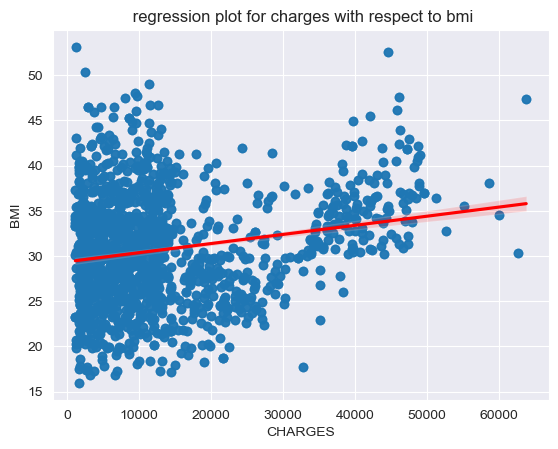

In [42]:
sns.regplot(data=insurance_data, x="charges", y="bmi", line_kws={"color": "red"})
plt.xlabel("CHARGES"); plt.ylabel("BMI"); plt.title(" regression plot for charges with respect to bmi")
plt.show(); plt.close()

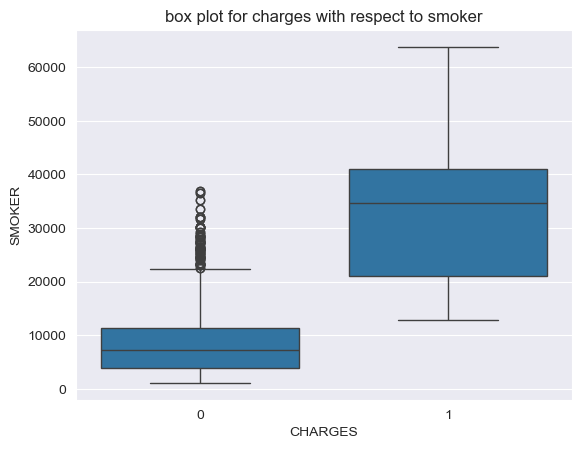

In [44]:
sns.boxplot(data=insurance_data, x="smoker", y="charges")
plt.xlabel("CHARGES"); plt.ylabel("SMOKER"); plt.title("box plot for charges with respect to smoker")
plt.show(); plt.close()

In [45]:
#   Dataset Correlation
insurance_data.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


#   Task 4 : Model Development

In [54]:
# linear Regression Model
lr = LinearRegression()
x_data = insurance_data[["smoker"]]; y_data = insurance_data[["charges"]]
lr.fit(x_data, y_data)
print("Score R^2 = ", lr.score(x_data, y_data))

Score R^2 =  0.6221791733924185


In [56]:
lr2 = LinearRegression()
z_data = insurance_data[["smoker", "age", "bmi", "no_of_children", "region", "gender"]]
lr2.fit(z_data, y_data)
print("Score R^2 = ", lr2.score(z_data, y_data))

Score R^2 =  0.7504083820289634


#   Pipeline


In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = z_data.astype(float)
pipe.fit(Z,y_data)
ypipe=pipe.predict(Z)
print(r2_score(y_data,ypipe))

0.8451356450108578


#   Task 5 : Model Refinement

In [62]:
x_data = insurance_data.drop(["smoker"], axis=1)
y_data = insurance_data[["charges"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [65]:
# Ridge regressor
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
yhat = rr.predict(x_test)
print("score R^2 = ", r2_score(y_test, yhat))

score R^2 =  1.0


In [68]:
# Polynomial Transformation
poly_lr = LinearRegression()
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
rr.fit(x_train_pr, y_train)
yhat = rr.predict(x_test_pr)
print("R^2 = ", r2_score(y_test, yhat))

R^2 =  1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15568e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
